In [46]:
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import lognorm
import networkx as nx
import pandas as pd

inList: list of lists such that inList[i] is a list of all the nodes sending connections TO node i
inWeight: list of lists containing the connection weights (transmission probabilities) corresponding to the connections in inList
outList: list of lists such that outList[i] is a list of all the nodes receiving connections FROM node i
outWeight: list of lists containing the connection weights (transmission probabilities) corresponding to the connections in outList
usernameList[i] gives the Twitter username corresponding to node i

In [47]:
f = open(r'C:\Users\arceb\PycharmProjects\Sciences_reseaux\congress_network\congress_network_data.json')
data = json.load(f)

inList = data[0]['inList']
inWeight = data[0]['inWeight']
outList = data[0]['outList']
outWeight = data[0]['outWeight']
usernameList = data[0]['usernameList']

all_weights = []
for single_node_weights in outWeight:
    all_weights.extend(single_node_weights)

In [25]:
data

[{'inList': [[4,
    9,
    11,
    13,
    18,
    27,
    29,
    33,
    38,
    45,
    46,
    50,
    57,
    58,
    59,
    71,
    74,
    76,
    77,
    85,
    86,
    87,
    202,
    315,
    341,
    374],
   [11,
    17,
    20,
    21,
    22,
    23,
    26,
    27,
    31,
    32,
    39,
    40,
    51,
    52,
    57,
    66,
    67,
    71,
    73,
    80,
    89,
    322],
   [13,
    18,
    21,
    24,
    36,
    37,
    42,
    45,
    50,
    54,
    56,
    61,
    64,
    68,
    71,
    76,
    79,
    82,
    85,
    86,
    87,
    88,
    90,
    91,
    118,
    130,
    162,
    171,
    178,
    349,
    368,
    415,
    463],
   [4, 8, 15, 19, 20, 22, 26, 30, 31, 32, 54, 72, 81, 83, 226, 385, 422, 449],
   [0,
    3,
    16,
    24,
    25,
    27,
    30,
    37,
    46,
    48,
    50,
    53,
    55,
    56,
    58,
    59,
    61,
    64,
    71,
    77,
    79,
    86,
    87,
    88,
    89,
    149,
    179,
    243,
    293,
    401],
   [

In [48]:
filename = "C:/Users/arceb/PycharmProjects/Sciences_reseaux/congress_network/congress.edgelist"
G = nx.readwrite.read_edgelist(filename)

# Now you can work with the loaded graph 'G'
# For example, you can print some basic information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 475
Number of edges: 10222


In [58]:
import ast

G = nx.read_edgelist('C:/Users/arceb/PycharmProjects/Sciences_reseaux/congress_network/congress.edgelist', comments="node", create_using=nx.DiGraph(), nodetype=int)

In [59]:
print(G.nodes())

[0, 4, 12, 18, 25, 30, 46, 55, 58, 59, 74, 76, 77, 85, 86, 87, 154, 168, 341, 374, 401, 3, 14, 17, 24, 27, 64, 79, 84, 88, 89, 149, 179, 197, 213, 224, 243, 250, 268, 286, 293, 315, 447, 460, 11, 13, 32, 57, 91, 126, 162, 254, 255, 327, 334, 392, 398, 448, 454, 470, 2, 9, 28, 42, 50, 54, 68, 110, 217, 229, 299, 442, 48, 53, 61, 71, 75, 80, 111, 123, 136, 147, 193, 205, 215, 247, 278, 387, 393, 403, 450, 452, 21, 47, 70, 72, 138, 160, 161, 190, 234, 246, 260, 306, 335, 389, 415, 422, 428, 20, 26, 36, 38, 130, 139, 201, 207, 251, 325, 349, 358, 367, 371, 423, 5, 90, 92, 119, 122, 135, 155, 165, 177, 256, 424, 465, 467, 6, 15, 35, 60, 81, 82, 148, 183, 375, 381, 411, 416, 437, 439, 8, 10, 37, 180, 262, 263, 281, 292, 351, 368, 376, 405, 433, 33, 65, 287, 329, 364, 23, 66, 117, 137, 266, 336, 400, 444, 466, 7, 51, 63, 188, 280, 296, 431, 443, 43, 73, 214, 311, 326, 408, 421, 121, 143, 169, 259, 410, 96, 105, 156, 157, 171, 174, 222, 270, 279, 303, 318, 365, 438, 461, 463, 142, 176, 194, 20

In [60]:
print(G.edges())

[(0, 4), (0, 12), (0, 18), (0, 25), (0, 30), (0, 46), (0, 55), (0, 58), (0, 59), (0, 74), (0, 76), (0, 77), (0, 85), (0, 86), (0, 87), (0, 154), (0, 168), (0, 341), (0, 374), (0, 401), (4, 0), (4, 3), (4, 12), (4, 14), (4, 17), (4, 24), (4, 25), (4, 27), (4, 30), (4, 46), (4, 55), (4, 58), (4, 59), (4, 64), (4, 79), (4, 84), (4, 88), (4, 89), (4, 149), (4, 154), (4, 168), (4, 179), (4, 197), (4, 213), (4, 224), (4, 243), (4, 250), (4, 268), (4, 286), (4, 293), (4, 315), (4, 374), (4, 401), (4, 447), (4, 460), (12, 11), (12, 13), (12, 17), (12, 30), (12, 32), (12, 46), (12, 55), (12, 57), (12, 59), (12, 64), (12, 74), (12, 84), (12, 89), (12, 91), (12, 126), (12, 162), (12, 254), (12, 255), (12, 327), (12, 334), (12, 392), (12, 398), (12, 448), (12, 454), (12, 470), (18, 0), (18, 2), (18, 9), (18, 14), (18, 28), (18, 42), (18, 46), (18, 50), (18, 54), (18, 55), (18, 57), (18, 59), (18, 68), (18, 79), (18, 85), (18, 110), (18, 217), (18, 229), (18, 299), (18, 442), (25, 4), (25, 17), (25

In [61]:
G.degree()

DiDegreeView({0: 46, 4: 65, 12: 62, 18: 45, 25: 81, 30: 61, 46: 82, 55: 82, 58: 79, 59: 83, 74: 69, 76: 50, 77: 62, 85: 56, 86: 44, 87: 119, 154: 75, 168: 19, 341: 81, 374: 71, 401: 115, 3: 56, 14: 51, 17: 123, 24: 75, 27: 74, 64: 66, 79: 65, 84: 55, 88: 65, 89: 73, 149: 98, 179: 113, 197: 83, 213: 25, 224: 49, 243: 37, 250: 24, 268: 75, 286: 63, 293: 61, 315: 124, 447: 53, 460: 62, 11: 51, 13: 43, 32: 76, 57: 42, 91: 49, 126: 92, 162: 64, 254: 187, 255: 58, 327: 88, 334: 15, 392: 35, 398: 29, 448: 49, 454: 26, 470: 59, 2: 55, 9: 63, 28: 28, 42: 36, 50: 70, 54: 89, 68: 53, 110: 34, 217: 39, 229: 70, 299: 55, 442: 75, 48: 34, 53: 68, 61: 84, 71: 122, 75: 28, 80: 52, 111: 148, 123: 13, 136: 98, 147: 148, 193: 84, 205: 75, 215: 121, 247: 18, 278: 54, 387: 59, 393: 190, 403: 49, 450: 70, 452: 103, 21: 42, 47: 47, 70: 41, 72: 95, 138: 67, 160: 92, 161: 65, 190: 157, 234: 59, 246: 88, 260: 36, 306: 33, 335: 147, 389: 139, 415: 39, 422: 72, 428: 126, 20: 42, 26: 76, 36: 26, 38: 30, 130: 80, 1

In [62]:
G.degree('4')

DiDegreeView({})

In [63]:
avg_degree = sum(dict(G.degree()).values()) / len(G)
print("Average degree of the graph:", avg_degree)

Average degree of the graph: 55.95368421052632


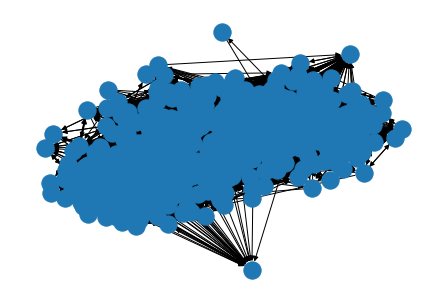

In [64]:
nx.draw(G)
plt.show()

In [66]:
# Neighbors of node 22
list(G.adj[4])

[0,
 3,
 12,
 14,
 17,
 24,
 25,
 27,
 30,
 46,
 55,
 58,
 59,
 64,
 79,
 84,
 88,
 89,
 149,
 154,
 168,
 179,
 197,
 213,
 224,
 243,
 250,
 268,
 286,
 293,
 315,
 374,
 401,
 447,
 460]

In [67]:
list(nx.isolates(G))

[]

In [68]:
nx.reciprocity(G)
print(round(nx.reciprocity(G)*100,1), "% of relations are reciprocical.")

46.2 % of relations are reciprocical.


In [70]:
print(nx.clustering(G))

{0: 0.2734833659491194, 4: 0.2341096555070354, 12: 0.18509615384615385, 18: 0.2773797338792221, 25: 0.21908017402113114, 30: 0.15496434448710916, 46: 0.16979987871437235, 55: 0.20792831105710813, 58: 0.13786344331917674, 59: 0.21762962962962962, 74: 0.22406371071889797, 76: 0.1809563066776587, 77: 0.2302771855010661, 85: 0.22831800262812088, 86: 0.2326943556975506, 87: 0.20461053837342497, 154: 0.24021739130434783, 168: 0.19117647058823528, 341: 0.2178649237472767, 374: 0.236959158916296, 401: 0.2236257847190323, 3: 0.14467668190725017, 14: 0.21904761904761905, 17: 0.13050167224080267, 24: 0.221758082092263, 27: 0.16126629422718808, 64: 0.2020225776105362, 79: 0.16788143828960156, 84: 0.21491525423728813, 88: 0.19684466019417476, 89: 0.14863828154967396, 149: 0.14260042283298097, 179: 0.17808436409768474, 197: 0.19982290436835892, 213: 0.1847457627118644, 224: 0.11426116838487972, 243: 0.289193302891933, 250: 0.09778597785977859, 268: 0.2526258601955813, 286: 0.18304033092037228, 293: 

In [69]:
print(nx.clustering(G)[4])

0.2341096555070354


In [71]:
print(nx.average_clustering(G))

0.22422040490798673


In [72]:
print(nx.transitivity(G))

0.21166932349342485


In [73]:
nx.density(G)

0.05902287363979569

In [74]:
G_undirected = nx.DiGraph.to_undirected(G)
print(list(nx.find_cliques(G_undirected)))

[[0, 38, 74], [0, 38, 46], [0, 168, 202], [0, 168, 4, 58], [0, 74, 11, 27, 12], [0, 74, 29], [0, 74, 59, 33, 77], [0, 74, 59, 58, 25], [0, 74, 59, 27, 18, 25], [0, 74, 59, 27, 12], [0, 74, 59, 27, 77, 25], [0, 74, 59, 27, 77, 86], [0, 74, 85, 33, 77], [0, 74, 85, 27, 18], [0, 74, 85, 27, 12], [0, 74, 85, 27, 77, 86], [0, 11, 12, 13], [0, 11, 12, 30, 27], [0, 11, 12, 30, 46], [0, 12, 46, 57], [0, 12, 46, 4, 50, 71], [0, 12, 46, 4, 30], [0, 12, 46, 76, 50], [0, 12, 341, 57], [0, 12, 85, 76, 50, 27], [0, 12, 85, 13], [0, 12, 59, 57, 27], [0, 12, 59, 55, 50, 27, 4], [0, 12, 59, 55, 50, 27, 76], [0, 12, 59, 55, 50, 71, 4], [0, 12, 59, 55, 13], [0, 12, 30, 27, 4], [0, 45, 33], [0, 45, 58, 30], [0, 45, 57], [0, 18, 25, 59, 57, 27], [0, 18, 25, 59, 55, 9], [0, 18, 25, 59, 55, 50, 27], [0, 18, 25, 46, 9], [0, 18, 25, 46, 50], [0, 18, 25, 46, 57], [0, 18, 85, 9], [0, 18, 85, 50, 27], [0, 87, 33, 59, 77], [0, 87, 33, 59, 55], [0, 87, 33, 85, 77], [0, 87, 4, 58, 50, 25, 59, 55], [0, 87, 4, 58, 50,

In [75]:
len(list(nx.find_cliques(G_undirected)))

21979

In [77]:
print(nx.is_weakly_connected(G))

True


In [79]:
print(nx.is_connected(G_undirected))

True


In [81]:
print(nx.diameter(G_undirected))
print(nx.average_shortest_path_length(G_undirected))

4
2.0638862980235397


In [84]:
print(nx.closeness_centrality(G))

{0: 0.4072164948453608, 4: 0.41725352112676056, 12: 0.4467483506126296, 18: 0.4034042553191489, 25: 0.4397031539888683, 30: 0.4281842818428184, 46: 0.48466257668711654, 55: 0.4509990485252141, 58: 0.4763819095477387, 59: 0.43807763401109057, 74: 0.42587601078167114, 76: 0.39434276206322794, 77: 0.40237691001697795, 85: 0.41074523396880414, 86: 0.395, 87: 0.4514285714285714, 154: 0.4688427299703264, 168: 0.35827664399092973, 341: 0.4570877531340405, 374: 0.45620789220404234, 401: 0.49581589958158995, 3: 0.4082687338501292, 14: 0.403747870528109, 17: 0.48416751787538304, 24: 0.41872791519434627, 27: 0.4034042553191489, 64: 0.4010152284263959, 79: 0.4232142857142857, 84: 0.4068669527896996, 88: 0.412532637075718, 89: 0.45620789220404234, 149: 0.4891640866873065, 179: 0.4301270417422868, 197: 0.4716417910447761, 213: 0.4194690265486726, 224: 0.47878787878787876, 243: 0.415061295971979, 250: 0.44886363636363635, 268: 0.4540229885057471, 286: 0.46745562130177515, 293: 0.43169398907103823, 31

In [85]:
print(nx.betweenness_centrality(G))

{0: 0.001092706065870422, 4: 0.002138609423422786, 12: 0.0036918360372507394, 18: 0.0009745765263505249, 25: 0.004577057598935396, 30: 0.0034153445254497734, 46: 0.007453180424329784, 55: 0.0037435910847693587, 58: 0.008630958955931908, 59: 0.004868133406734935, 74: 0.003578136932051915, 76: 0.0016551045251612447, 77: 0.002739112663291009, 85: 0.0024090507175677906, 86: 0.0016817971104330217, 87: 0.008416557908474578, 154: 0.004013827754249561, 168: 0.0002585204543529581, 341: 0.005430113972628774, 374: 0.002175899902474906, 401: 0.004103229306505293, 3: 0.0028839754346226517, 14: 0.0019070549821156402, 17: 0.016458843425795636, 24: 0.0033056896652372777, 27: 0.005353080115294536, 64: 0.0032373206743763947, 79: 0.00449798432652714, 84: 0.0025646021235544024, 88: 0.0027742441995620287, 89: 0.006071252721543, 149: 0.006780671765366367, 179: 0.004633186599429766, 197: 0.0021477604705300393, 213: 0.00035098319618351054, 224: 0.0023432873003201462, 243: 0.0006789331129441586, 250: 0.0011864

## Attributes

In [31]:
Attributes = pd.read_csv(r'C:\Users\arceb\PycharmProjects\Sciences_reseaux\congress_network\congress_member_attributes.csv')
print(Attributes)

     congress_member sex  age party chamber
0     SenatorBaldwin   F   60     D       S
1    SenJohnBarrasso   H   70     R       S
2      SenatorBennet   H   60     D       S
3    MarshaBlackburn   F   70     R       S
4      SenBlumenthal   H   76     D       S
..               ...  ..  ...   ...     ...
470     RepJoeWilson   H   75     R     Rep
471       RobWittman   H   63     R     Rep
472  rep_stevewomack   H   65     R     Rep
473   RepJohnYarmuth   H   75     R     Rep
474     RepLeeZeldin   H   42     R     Rep

[475 rows x 5 columns]


In [32]:
f = open(r'C:\Users\arceb\PycharmProjects\Sciences_reseaux\congress_network\congress_network_data.json')
data = json.load(f)

In [33]:
# Calculate the number of edges for each node
num_edges = [len(inList[i]) + len(outList[i]) for i in range(len(inList))]

# Create a dataframe
df_nb_reteweet = pd.DataFrame({
    'Twitter Username': usernameList,
    'Number of Edges': num_edges
})

# Display the dataframe
df_nb_reteweet

,Twitter Username,Number of Edges
0,SenatorBaldwin,46
1,SenJohnBarrasso,41
2,SenatorBennet,55
3,MarshaBlackburn,56
4,SenBlumenthal,65
...,...,...
470,RepJoeWilson,59
471,RobWittman,32
472,rep_stevewomack,54
473,RepJohnYarmuth,25


In [34]:
Attributes = Attributes.set_index('congress_member').drop("age",axis=1)

In [29]:
in_degree_centrality = [len(in_list) for in_list in inList]
top_5_in_degree_indices = sorted(range(len(in_degree_centrality)), key=lambda i: in_degree_centrality[i], reverse=True)[:30]
top_5_in_degree_indices

[322,
 208,
 190,
 111,
 254,
 385,
 269,
 192,
 147,
 303,
 92,
 335,
 188,
 389,
 401,
 350,
 393,
 113,
 137,
 215,
 461,
 126,
 382,
 386,
 17,
 324,
 400,
 134,
 132,
 242]

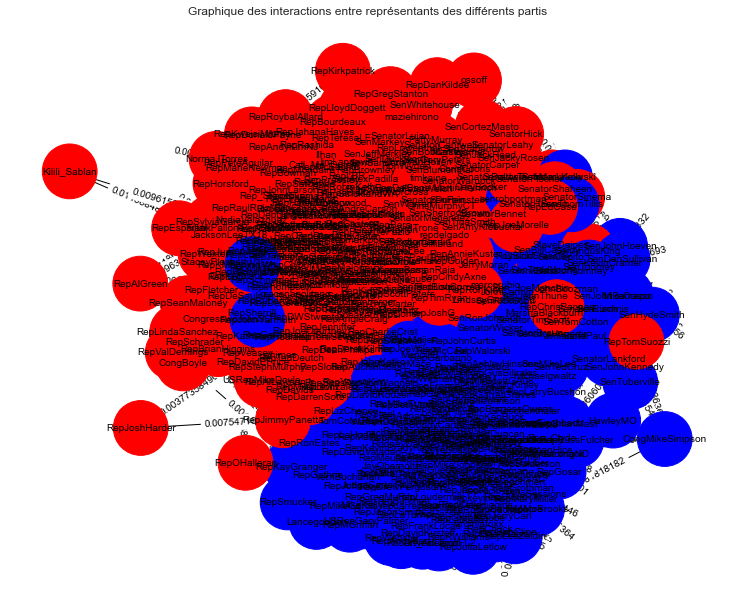

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

party_dict = {username: Attributes.loc[username, 'party'] for username in usernameList}

# Créer un graphique non dirigé
G = nx.Graph()

# Ajouter les nœuds avec les couleurs appropriées
for username, party in party_dict.items():
    color = 'red' if party == 'R' else 'blue'
    G.add_node(username, color=color)

# Ajouter les arêtes pondérées
for i, out_edges in enumerate(outList):
    source_username = usernameList[i]
    for j, target_index in enumerate(out_edges):
        target_username = usernameList[target_index]
        weight = outWeight[i][j]
        G.add_edge(source_username, target_username, weight=weight)

# Définir les positions des nœuds pour une meilleure visualisation
pos = nx.spring_layout(G)

# Extraire les couleurs des nœuds pour la visualisation
node_colors = [color for _, color in nx.get_node_attributes(G, 'color').items()]

# Dessiner le graphique
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=3000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Graphique des interactions entre représentants des différents partis")
plt.show()


TypeError: 'bool' object is not iterable

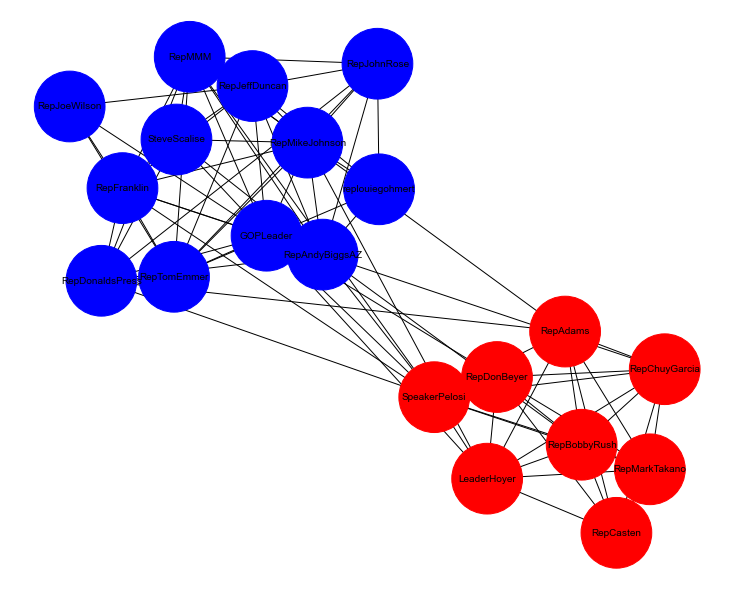

In [86]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph without direction
G = nx.Graph()

# Add nodes with appropriate colors
for username, party in party_dict.items():
    color = 'red' if party == 'R' else 'blue'
    G.add_node(username, color=color)

# Add weighted edges
for i, out_edges in enumerate(outList):
    source_username = usernameList[i]
    for j, target_index in enumerate(out_edges):
        target_username = usernameList[target_index]
        weight = outWeight[i][j]
        G.add_edge(source_username, target_username, weight=weight)

# Calculate the out-degree for each node by summing up the weights of outgoing edges
out_degree_dict = {node: sum(G.edges[node, neighbor]['weight'] for neighbor in G.neighbors(node)) for node in G.nodes}

# Find the top 30 usernames with the most out-degree overall
top_users = sorted(out_degree_dict.items(), key=lambda x: x[1], reverse=True)[:20]
top_usernames = [username for username, _ in top_users]

# Create a subgraph with only the top 30 usernames and their connections
H = G.subgraph(top_usernames)

# Define node positions for better visualization
pos = nx.spring_layout(H)

# Extract node colors for visualization
node_colors = [H.nodes[node]['color'] for node in H.nodes]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(H, pos, with_labels=True, node_color=node_colors, node_size=5000, font_size=10)
nx.draw_networkx_edge_labels(H, pos, edge_labels=False)
plt.title("Graph of interactions among representatives of different parties (Top 30 users)")
plt.show()


TypeError: 'bool' object is not iterable

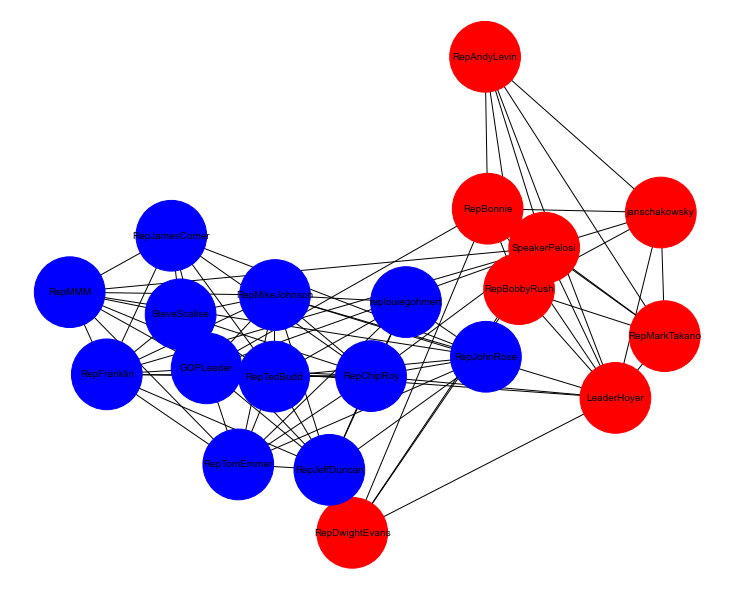

In [88]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph without direction
G = nx.Graph()

# Add nodes with appropriate colors
for username, party in party_dict.items():
    color = 'red' if party == 'R' else 'blue'
    G.add_node(username, color=color)

# Add weighted edges
for i, in_edges in enumerate(inList):
    source_username = usernameList[i]
    for j, target_index in enumerate(in_edges):
        target_username = usernameList[target_index]
        weight =inWeight[i][j]
        G.add_edge(source_username, target_username, weight=weight)

# Calculate the out-degree for each node by summing up the weights of outgoing edges
in_degree_dict = {node: sum(G.edges[node, neighbor]['weight'] for neighbor in G.neighbors(node)) for node in G.nodes}

# Find the top 30 usernames with the most out-degree overall
top_users = sorted(in_degree_dict.items(), key=lambda x: x[1], reverse=True)[:20]
top_usernames = [username for username, _ in top_users]

# Create a subgraph with only the top 30 usernames and their connections
H = G.subgraph(top_usernames)

# Define node positions for better visualization
pos = nx.spring_layout(H)

# Extract node colors for visualization
node_colors = [H.nodes[node]['color'] for node in H.nodes]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(H, pos, with_labels=True, node_color=node_colors, node_size=5000, font_size=10)
nx.draw_networkx_edge_labels(H, pos, edge_labels=False)
plt.title("Graph of interactions among representatives of different parties (Top 30 users)")
plt.show()